# Context and Defining Problem Statement

The data we have at hand is of passengers and their feedback regarding their flight experience. 

Each row is one passenger. Apart from the  feedback from the customers accross various attributes(15 in total) like food, online_support, cleanliness etc, we have data about the customers' age, loyalty to the airline, gender and class.

The target column is a binary variable which tells us if the customer is satisfied or neutral/dissatisfied

The task at hand is to analyze the data and build a model to predict customer satisfaction using all or some of the data we have.

# Steps - 
- Data loading and preprocessing
- Exploratory Data Analysis
- Model building and evaluation
- Model Tuning
- Implementing the process through Pipeline

# Data loading and preprocessing

### 1. Import Pandas, Numpy, pyplot and seaborn

In [167]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

In [168]:
pd.options.display.max_columns = None

### 2. Import the dataframes that are needed
- Import "Flight data_Train.csv" and "Surveydata_Train.csv"

In [169]:
df1 = pd.read_csv("Flight_data.csv")  # Read the data regarding customer attributes
df2 = pd.read_csv("Survey_data.csv")   # Feedback data from customers

In [170]:
df1.head(5)

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0


In [171]:
df2.head(5)

,Id,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,acceptable,poor,need improvement,need improvement,poor
1,193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,acceptable,excellent,acceptable,excellent,acceptable
2,174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,good,need improvement,excellent,need improvement,excellent
3,191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,good,poor,acceptable,acceptable,poor
4,221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,good,good,excellent,good,good


### 3. Join the two dataframes using the 'id' column as the primary key
- Rename the Id column of one dataframe so that there "id" column name becomes same

In [172]:
#Using pandas' Join method
#c = a.join(b)  # Joining two dfs on the 'Id' column

#df = df2.set_index("Id").join(df1.set_index("ID"))

# Use Merge instead
df = pd.merge(df1, df2,how='inner', left_on='ID', right_on='Id')
df.drop(columns='Id',inplace=True)
df.set_index('ID',inplace=True)
print(df.shape)
df.head()  # the combined dataframe

# Prefer to use Merge function

(90917, 23)


,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,,,
149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,extremely poor,NaN,extremely poor,manageable,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


In [173]:
df.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

### 4. Print the number of missing values in each of the columns

In [113]:
df.isna().sum() # Since True is 1 and False is 0, if you do a sum of a boolean dataframe, we get the number of trues in each col

Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
dtype: int64

In [24]:
df.isna().sum() / df.shape[0] * 100
# Sum categorical variables has 10% missing values. As we have 6 uniques per category, we can asssign missing as Unknown
# and run baseline models to see if including these variables are useful. In this case, we decide to drop the variables

Gender                                0.000000
CustomerType                         10.008029
Age                                   0.000000
TypeTravel                            9.995930
Class                                 0.000000
Flight_Distance                       0.000000
DepartureDelayin_Mins                 0.000000
ArrivalDelayin_Mins                   0.312373
Satisfaction                          0.000000
Seat_comfort                          0.000000
Departure.Arrival.time_convenient     9.067611
Food_drink                            8.998317
Gate_location                         0.000000
Inflightwifi_service                  0.000000
Inflight_entertainment                0.000000
Online_support                        0.000000
Ease_of_Onlinebooking                 0.000000
Onboard_service                       7.896213
Leg_room_service                      0.000000
Baggage_handling                      0.000000
Checkin_service                       0.000000
Cleanliness  

In [29]:
# you can also find it using the snippet below
df.isnull().apply(pd.value_counts,axis=1)  

,False,True
ID,,
149965,23.0,NaN
149966,22.0,1.0
149967,22.0,1.0
149968,23.0,NaN
149969,22.0,1.0
...,...,...
240877,23.0,NaN
240878,23.0,NaN
240879,22.0,1.0


In [20]:
df.describe(include='all')

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
count,90917,81818,90917.000000,81829,90917,90917.000000,90917.000000,90633.000000,90917,90917,82673,82736,90917,90917,90917,90917,90917,83738,90917,90917,90917,90917,90917
unique,2,2,NaN,2,3,NaN,NaN,NaN,2,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,satisfied,acceptable,good,acceptable,manageable,good,good,good,good,good,good,good,good,good,good
freq,46186,66897,NaN,56481,43535,NaN,NaN,NaN,49761,20552,18840,17991,23385,22159,29373,29042,27993,26373,27814,33822,25483,34246,24676
mean,NaN,NaN,39.447166,NaN,NaN,1981.629442,14.686593,15.058930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,15.129794,NaN,NaN,1026.779932,38.669260,39.038523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,27.000000,NaN,NaN,1360.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,40.000000,NaN,NaN,1927.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,51.000000,NaN,NaN,2542.000000,12.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Assign variables to Categorical vs Numeric

#Categorical -'Gender', 'CustomerType','TypeTravel', 'Class','Satisfaction', 'Seat_comfort','Food_drink', 'Gate_location',
# 'Departure.Arrival.time_convenient','Inflightwifi_service','Inflight_entertainment', ,'Online_support', 'Ease_of_Onlinebooking',
#'Onboard_service', 'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding'
    
#Numerical - 'Age','Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'


      
        

Index(['Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

### 5. Drop all the rows having atleast one missing values and check the shape of the dataframe before and after dropping the rows
- Fill null values in ArrivalDelayin_Mins with mean
- After that drop all the rows with null values

In [115]:
# There are a few columns where out of the total ~90k records, ~8k have missing value. Imputing them with a central tendency
# might add undesirable noise in the data. Hence, lets tackle only the columns that have less missing values.

# But before imputation let us check the distribution of the data. If there are outliers, we would prefer to impute with median
# else mean can be good option.


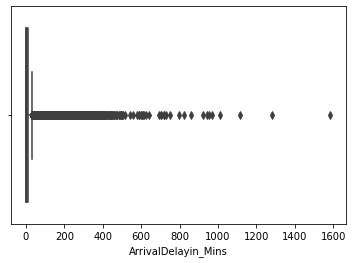

In [30]:
sns.boxplot(df['ArrivalDelayin_Mins'])

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,90917.0,39.447166,15.129794,7.0,27.0,40.0,51.0,85.0
Flight_Distance,90917.0,1981.629442,1026.779932,50.0,1360.0,1927.0,2542.0,6950.0
DepartureDelayin_Mins,90917.0,14.686593,38.669260,0.0,0.0,0.0,12.0,1592.0
ArrivalDelayin_Mins,90633.0,15.058930,39.038523,0.0,0.0,0.0,13.0,1584.0


In [174]:
# the above two analysis suggest that we are in for many outliers
# so let us use the median to impute the values

df.ArrivalDelayin_Mins.fillna(df.ArrivalDelayin_Mins.median(), inplace = True)

# Alternate way - You can use the simpleimputer function of the sklearn.impute. You can try it out!
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') 
# df['ArrivalDelayin_Mins'] = imputer.fit_transform(df['ArrivalDelayin_Mins'].values.reshape(-1,1))

# Keep delay as related to satisfcation - distribution is very skewed. So, use median. as not assume data closer to extreme values

In [175]:
# Rest other missing values are filled with not_captured.
#It can be done in other way also or also can be dropped according to the problem and business context.
df.dropna(inplace = True) 

In [176]:
print(df.shape)

(53798, 23)


# Univariate Analysis for Numerical variables only

In [87]:
df.skew().sort_values(ascending=False)
## Too many outliers in DepartureDelayin_Mins & ArrivalDelayin_Mins

DepartureDelayin_Mins                6.828421
ArrivalDelayin_Mins                  6.731975
Flight_Distance                      0.471570
Gender                               0.040755
Age                                 -0.002069
Gate_location                       -0.050837
Seat_comfort                        -0.095114
Food_drink                          -0.112280
Satisfaction                        -0.192723
Inflightwifi_service                -0.199322
Departure.Arrival.time_convenient   -0.249029
Online_boarding                     -0.371012
Checkin_service                     -0.390597
Ease_of_Onlinebooking               -0.502921
Leg_room_service                    -0.508006
Onboard_service                     -0.512495
Class                               -0.546712
Online_support                      -0.581328
Inflight_entertainment              -0.602691
Baggage_handling                    -0.752741
Cleanliness                         -0.759752
TypeTravel                        

In [88]:
df.kurt().sort_values(ascending=False)

DepartureDelayin_Mins                88.885243
ArrivalDelayin_Mins                  85.556284
CustomerType                          0.730140
Flight_Distance                       0.399157
Cleanliness                          -0.186757
Baggage_handling                     -0.209580
Inflight_entertainment               -0.528986
Class                                -0.619530
Age                                  -0.715282
Onboard_service                      -0.773644
Checkin_service                      -0.793005
Online_support                       -0.805324
Leg_room_service                     -0.821809
Ease_of_Onlinebooking                -0.897653
Online_boarding                      -0.934951
Seat_comfort                         -0.940998
Food_drink                           -0.986238
Departure.Arrival.time_convenient    -1.086007
Gate_location                        -1.088817
Inflightwifi_service                 -1.118510
TypeTravel                           -1.330567
Satisfaction 

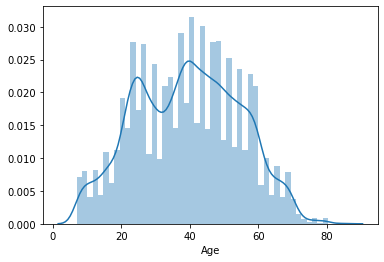

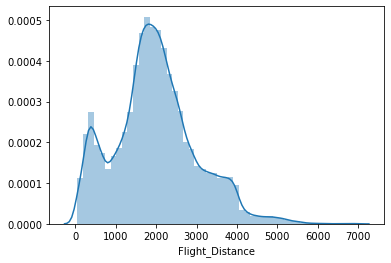

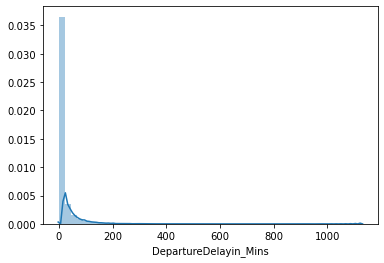

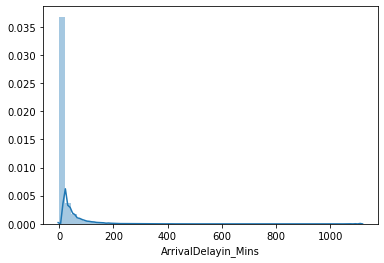

In [86]:
for i,col in enumerate(['Age','Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins']):
    sns.distplot(df[col])
    plt.show()
# Can do log transformation for DepartureDelayin_Mins & ArrivalDelayin_Mins

# Exploratory Data Analysis

### 6. Print correlation

In [36]:
cor = df.corr() # It will show correlation of only numerical variables here.

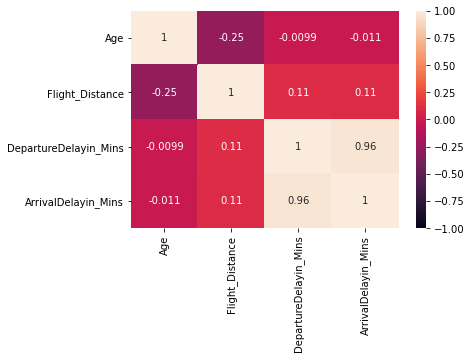

In [45]:
sns.heatmap(cor,annot=True,fmt='.2g',vmin=-1,vmax=1)
# Arriavl and Departure delay correlated - makes sense. So, can drop one of the two to avoid issues with linear models

- There is just one obvious correlation that we can see that is between arrival delay and departure delay. We can drop one of the variables here

In [402]:
to_drop = ['DepartureDelayin_Mins']

### Feedback columns
Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding'

### 7. Manually encode these variables(printed above) such that they follow an order based on the meaning. 

In [178]:
# Manual label encoding - Why ?
df.replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3, 
            'good' : 4, 'excellent' : 5}, inplace = True)  

df.replace({'very inconvinient' : 0, 'Inconvinient' : 1, 'need improvement' : 2, 'manageable' : 3,
            'Convinient' : 4, 'very convinient' : 5}, inplace = True)

# if one hot encoded, so many diff columns(6);as variables are ordinal so label encode

In [179]:
# check for encodings
df['Departure.Arrival.time_convenient'].value_counts()

4    12166
5    11123
3     9656
2     9554
1     8559
0     2740
Name: Departure.Arrival.time_convenient, dtype: int64

### 8. Display countplot of every feedback attribute with respect to Customer Satisfaction. 

You can use sns.countplot and set hue  = 'Satisfaction'

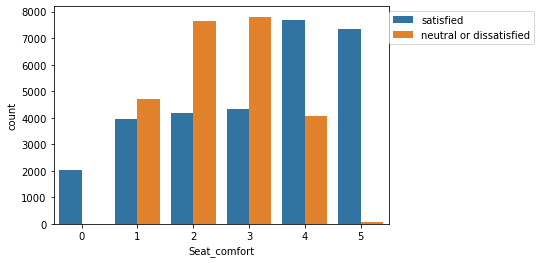

In [180]:
# We can use seaborn's countplot to plot a stacked baatchart
sns.countplot(df.Seat_comfort, hue = df.Satisfaction) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1))   # to place the legend in a 'good' position

# positivily correlated with seat comfort level. very clearly see satisified grows with seat confort level so seperation available
# not happen in datasets often; 0 - satisifed issue need to check on - could be missing values

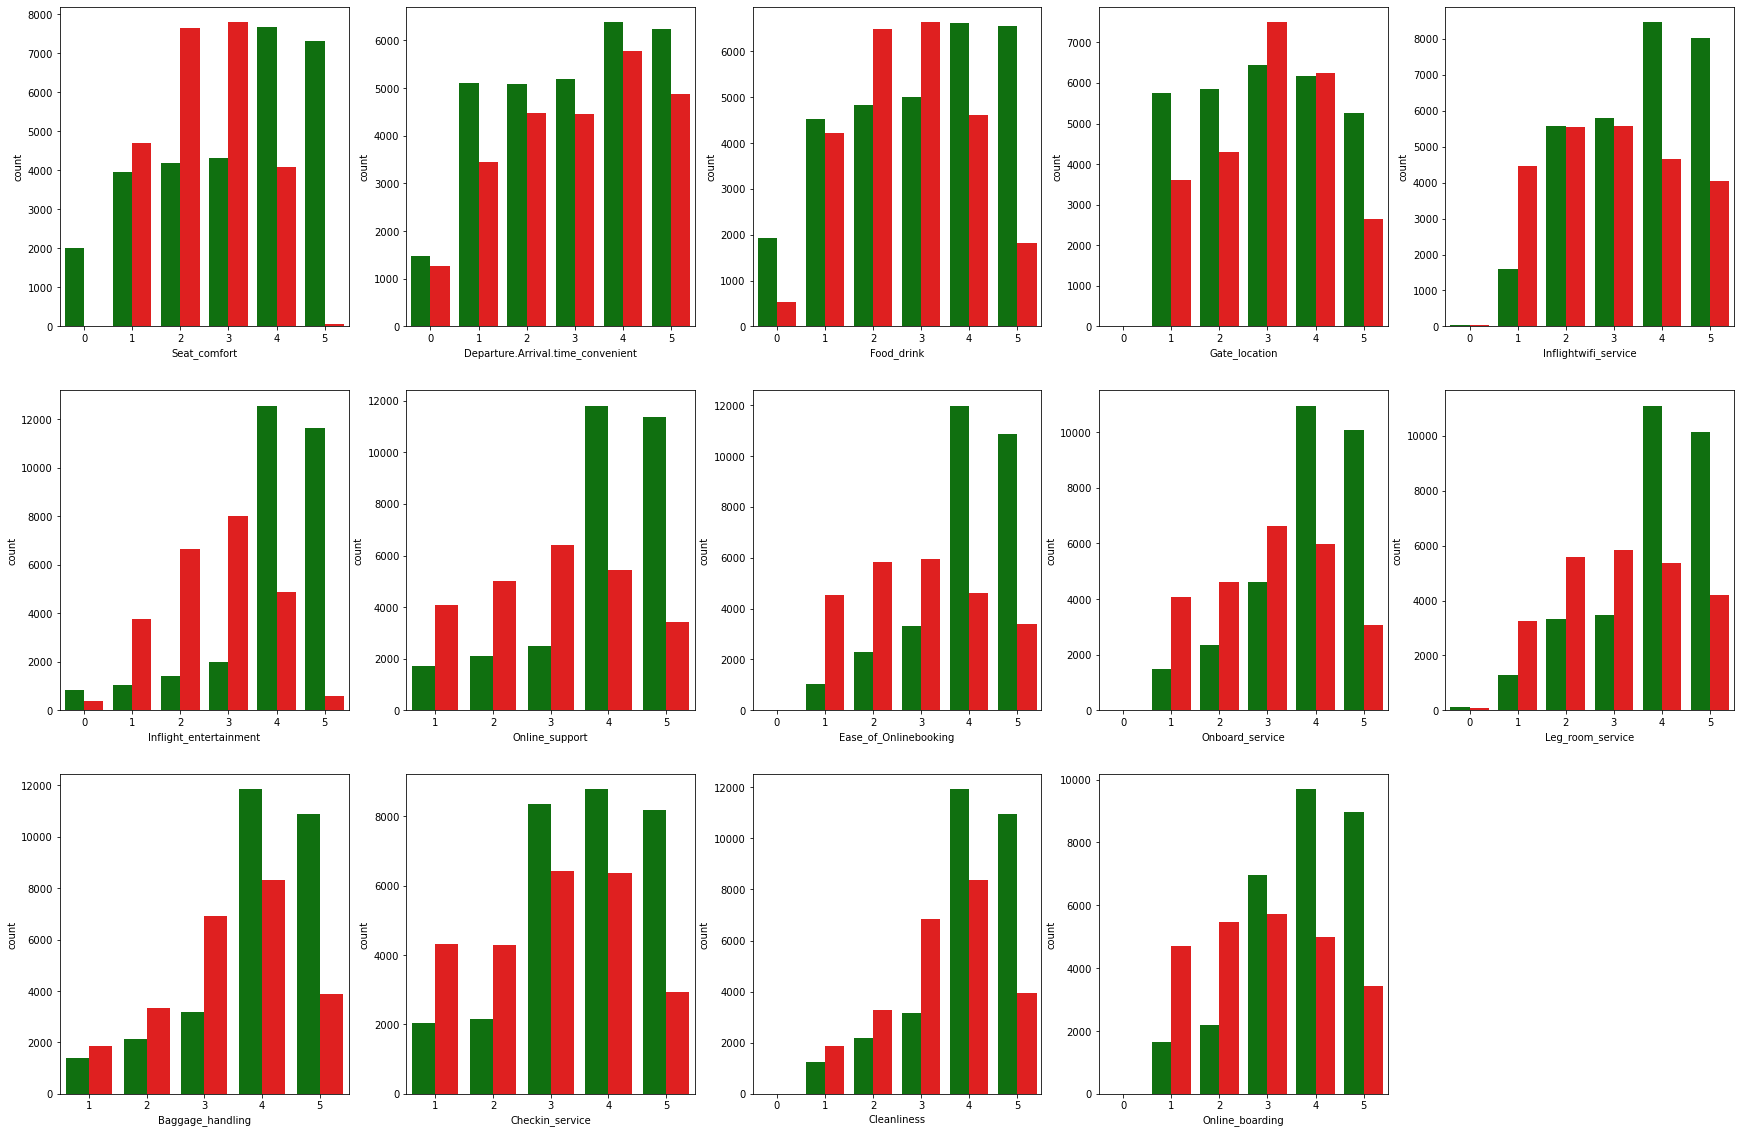

In [181]:
# Since there are a lot of columns that we want to plot, we can put all of them in one plot by using subplot()
# Additionally, since there are a lot of subplots that need to be plotted, we can use a for loop

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(df[i], hue = df.Satisfaction,
                  palette = {'satisfied':'green','neutral or dissatisfied': 'red'})
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   
    
# Online is interesting as we see similar distributions for Ease_Of_Online_Booking, Online_Boarding, & Online Support. so
# we can combine these variables


In [182]:
# Test different categorical variable relationship with Satisfaction variable - Crosstab
for i in feedback:
    print(i)
    print('\n')
    print(pd.crosstab(df[i],df['Satisfaction'],normalize='index').sort_values(ascending=True,by=i))
    print('\n')

Seat_comfort


Satisfaction  neutral or dissatisfied  satisfied
Seat_comfort                                    
0                            0.001978   0.998022
1                            0.543965   0.456035
2                            0.646458   0.353542
3                            0.644147   0.355853
4                            0.346916   0.653084
5                            0.007850   0.992150


Departure.Arrival.time_convenient


Satisfaction                       neutral or dissatisfied  satisfied
Departure.Arrival.time_convenient                                    
0                                                 0.461314   0.538686
1                                                 0.403084   0.596916
2                                                 0.468600   0.531400
3                                                 0.462200   0.537800
4                                                 0.475095   0.524905
5                                                 0.439180   0.56

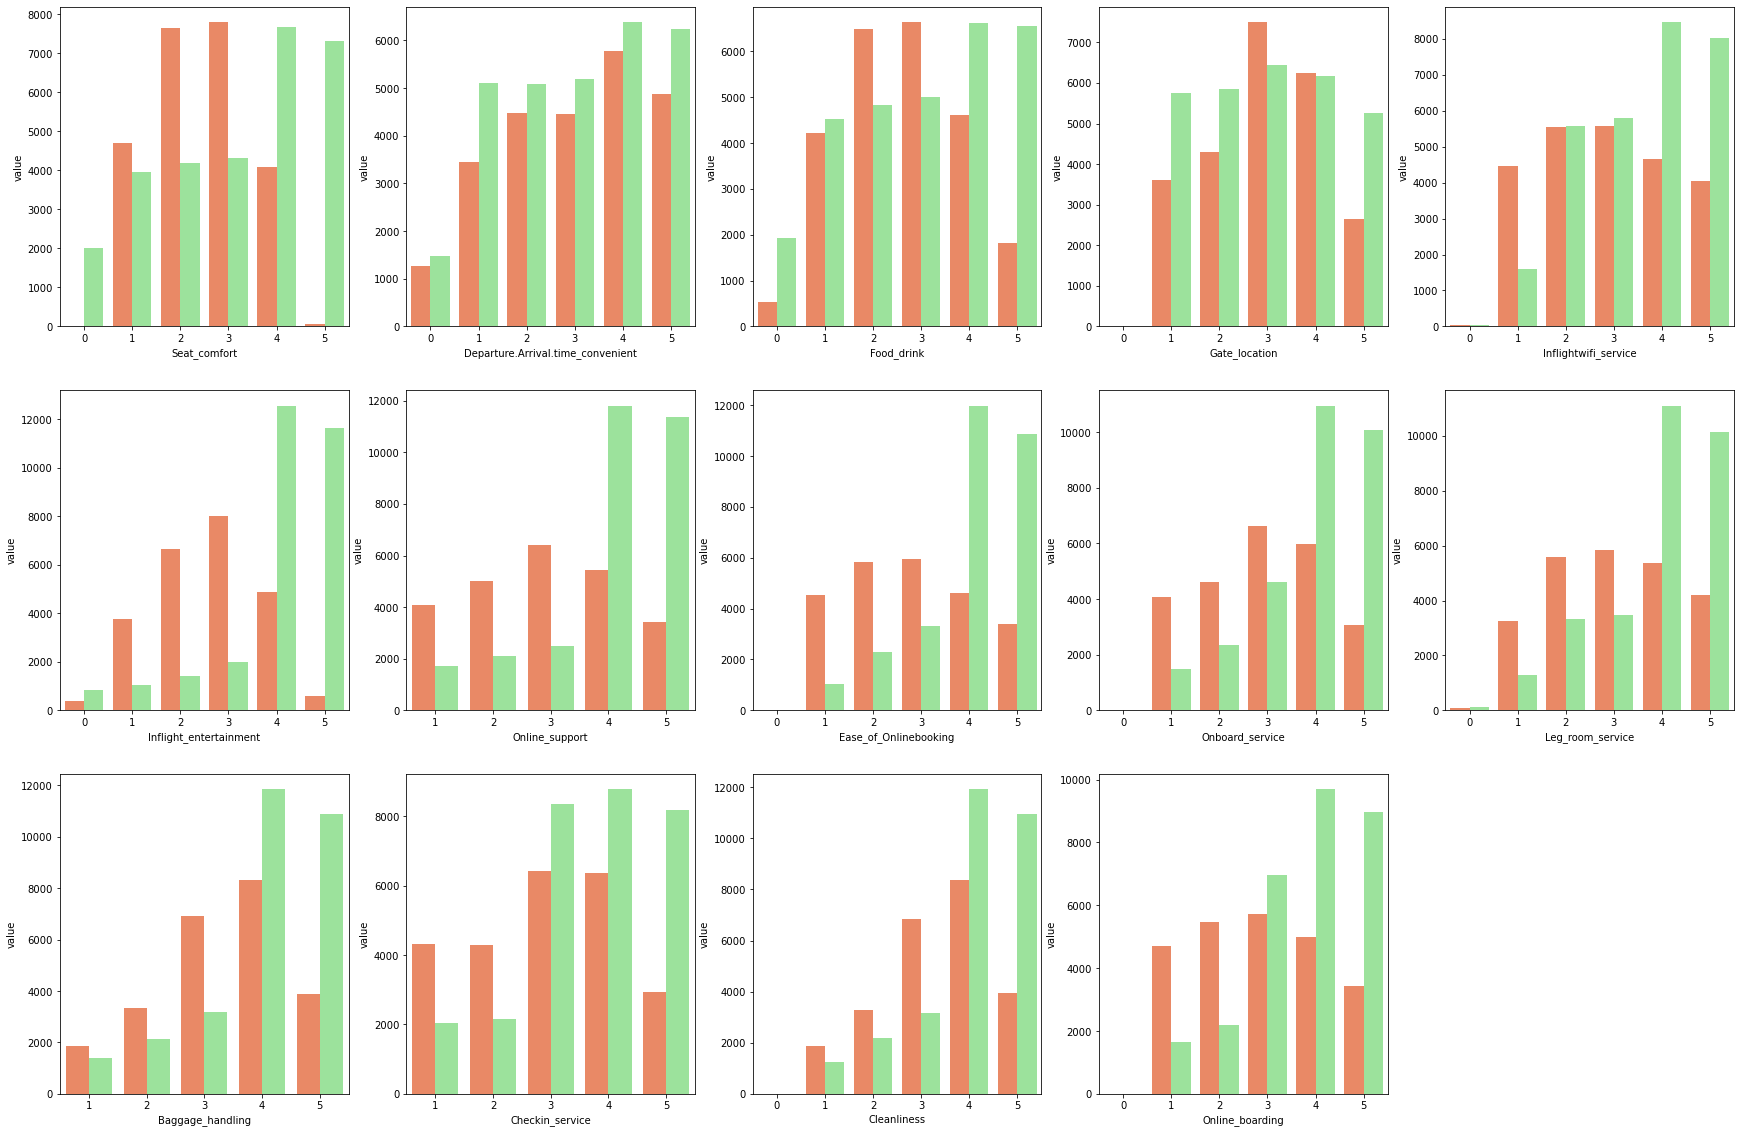

In [183]:
# Alternate way
# Using sns.barplot()

plt.figure(figsize= (30,20))  
pos = 1  
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    ct = pd.crosstab(df[i], df.Satisfaction)  # Crosstab 
    stacked =ct.stack().reset_index().rename(columns={0:'value'}) #dataframe with name and count accross satisfaction levels
    plt.subplot(3, 5, pos)
    sns.barplot(x=stacked[i], y=stacked.value, hue=stacked.Satisfaction,
               palette = {'satisfied':'lightgreen','neutral or dissatisfied': 'coral'}) # Barplot
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one    

In [184]:
# Stack function pivots column to rows
ct = pd.crosstab(df['Seat_comfort'], df.Satisfaction)
print(ct)
stack = ct.stack().reset_index().rename(columns={0:'value'})
print(stack)

Satisfaction  neutral or dissatisfied  satisfied
Seat_comfort                                    
0                                   4       2018
1                                4714       3952
2                                7656       4187
3                                7809       4314
4                                4078       7677
5                                  58       7331
    Seat_comfort             Satisfaction  value
0              0  neutral or dissatisfied      4
1              0                satisfied   2018
2              1  neutral or dissatisfied   4714
3              1                satisfied   3952
4              2  neutral or dissatisfied   7656
5              2                satisfied   4187
6              3  neutral or dissatisfied   7809
7              3                satisfied   4314
8              4  neutral or dissatisfied   4078
9              4                satisfied   7677
10             5  neutral or dissatisfied     58
11             5    

### 9. Draw all the insights that you can from the plots

**Green and orange bars are counts of satisfied and dissatisfied customers respectively. We want to look for areas where there is a visually significant difference between the length of the stacked bars**

- From the plots above,
    - Seating comfort can cause high levels of satisfaction to customers. Hardly any people who rated highly for seat_comfort were dissatisfied
    - A similar case with respect to inflight_entertainment. In this case, having less entertainment seems to have caused far more dissatisfaction compared to bad seating.
    - Difference is observed in ease_of_online_booking quiet evidently

### 10. Print the average feedback score
- When Satisfaction columns equals 'satisfied'
- When Satisfaction columns is not equal to 'satisfied'

In [185]:
Feedback_cols = ['Seat_comfort', 'Departure.Arrival.time_convenient',
                 'Food_drink', 'Gate_location', 'Inflightwifi_service',
                 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 
                 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service',
                 'Cleanliness', 'Online_boarding']

In [186]:
df.groupby('Satisfaction').mean() # Average rating of individual feedback attributes across satisfaction levels
# Proportions of satisfy / dissatisfy between features. Gate Location not have big impact. 
# Online boarding show as big difference. 
# Can check Gate Location to be useful based on Hypothesis Testing

,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
Satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,37.451334,2028.216251,18.005181,18.562400,2.469468,3.015667,2.659690,3.000864,2.922571,2.61820,2.963691,2.855216,2.972573,3.061598,3.370040,2.971504,3.380484,2.875529
satisfied,41.018590,1943.874894,12.120052,12.241256,3.142271,2.970793,3.001153,2.977238,3.530004,4.01557,3.983751,3.996981,3.875912,3.852641,3.972896,3.641100,3.985651,3.750161


### 11. Draw any insights that you can from the above values

- Observe the Exreme values (lower side for 'dissatisfaction' and higher side for 'satisfaction')
- Bad seats are a strong cause for customer dissatisfication
- Time convenience doesn't seem to be that big of a deal
- Dissatisfied customers had some bad experiences with food but average food seems to satisfy most people
- Gate location is totally irrelevant
- Wifi is quiet a factor. On an average, having good wifi yeilded customer satisfaction
- Easy online booking facility seems to be very important for customer satisfaction
- In flight entertainment seems to be a deal breaker

### 12. Create a new column which is the mean of 'Ease_of_Onlinebooking', 'Online_boarding', 'Online_support' and name it "avg_feedback_of_online_services". 

DIY : If online services has a bad ratings then what is the average ratings of other feedback attributes? 
And how does it impact Final Satisfaction of customers?

In [187]:
online_df = df.loc[:, ['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support','Satisfaction']]
online_df['avg_feedback_of_online_services'] = online_df[['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']].mean(axis = 1)

online_df['avg_feedback_of_online_services'].value_counts()
# Example of Feature Engineering - combining all the three online variables

4.000000    10898
3.000000     7105
5.000000     6522
4.333333     5457
2.000000     5335
3.666667     3799
1.000000     3705
4.666667     3470
3.333333     2565
2.666667     2128
2.333333     1886
1.666667      685
1.333333      241
0.666667        2
Name: avg_feedback_of_online_services, dtype: int64

In [188]:
online_df.groupby('Satisfaction').mean()

,Ease_of_Onlinebooking,Online_boarding,Online_support,avg_feedback_of_online_services
Satisfaction,,,,
neutral or dissatisfied,2.855216,2.875529,2.963691,2.898145
satisfied,3.996981,3.750161,3.983751,3.910298


In [189]:
df['avg_feedback_of_online_services'] = df[['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']].mean(axis = 1)


# Model building and evaluation

### 14. Encode the columns "Gender", "CustomerType", "TypeTravel", "Class", "Satisfaction" 
- Use manual encoding or other type of encoding

In [190]:
# Number of classes in each of the categorical attributes
for i in df.columns:
    if df[i].dtype == 'O':
        print(i, '->', len(df[i].value_counts()))

Gender -> 2
CustomerType -> 2
TypeTravel -> 2
Class -> 3
Satisfaction -> 2


In [191]:
df.Class.value_counts()

Business    25718
Eco         24156
Eco Plus     3924
Name: Class, dtype: int64

In [192]:
#Manual Encoding
df.replace({'Loyal Customer' : 1, 'disloyal Customer' : 0,
               'Business travel' : 1, 'Personal Travel' : 0,
              'Female' : 0, 'Male' : 1,
               'satisfied' : 1, 'neutral or dissatisfied' : 0, 'Eco Plus': 0 , 'Eco': 1, 'Business': 2}, inplace = True)
               

In [193]:
df.head(5)

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,avg_feedback_of_online_services
ID,,,,,,,,,,,,,,,,,,,,,,,,
149965,0,1,65,0,1,265,0,0.0,1,0,0,0,2,2,4,2,3,3,0,3,5,3,2,2.333333
149968,0,1,70,0,1,354,0,0.0,1,0,0,0,3,4,3,4,2,2,0,2,4,2,5,3.666667
149973,0,1,58,0,1,104,47,48.0,1,0,0,0,3,3,3,3,3,3,0,1,2,3,5,3.666667
149974,0,1,34,0,1,3633,0,0.0,1,0,0,0,4,2,0,2,2,3,2,5,2,5,2,2.000000
149975,1,1,62,0,1,1695,0,0.0,1,0,0,0,4,5,0,5,5,1,3,2,2,4,5,5.000000


In [194]:
#onehotencoding
df_coded = pd.get_dummies(df)

In [195]:
df_coded.head(5)

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,avg_feedback_of_online_services
ID,,,,,,,,,,,,,,,,,,,,,,,,
149965,0,1,65,0,1,265,0,0.0,1,0,0,0,2,2,4,2,3,3,0,3,5,3,2,2.333333
149968,0,1,70,0,1,354,0,0.0,1,0,0,0,3,4,3,4,2,2,0,2,4,2,5,3.666667
149973,0,1,58,0,1,104,47,48.0,1,0,0,0,3,3,3,3,3,3,0,1,2,3,5,3.666667
149974,0,1,34,0,1,3633,0,0.0,1,0,0,0,4,2,0,2,2,3,2,5,2,5,2,2.000000
149975,1,1,62,0,1,1695,0,0.0,1,0,0,0,4,5,0,5,5,1,3,2,2,4,5,5.000000


In [196]:
df_coded.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'avg_feedback_of_online_services'],
      dtype='object')

In [197]:
df.describe(include='all').T
# Good idea to do after preprocessing as well. 

,count,mean,std,min,25%,50%,75%,max
Gender,53798.0,0.489814,0.499901,0.000000,0.000000,0.000000,1.000000,1.0
CustomerType,53798.0,0.818451,0.385476,0.000000,1.000000,1.000000,1.000000,1.0
Age,53798.0,39.406037,15.085411,7.000000,27.000000,40.000000,51.000000,85.0
TypeTravel,53798.0,0.689319,0.462777,0.000000,0.000000,1.000000,1.000000,1.0
Class,53798.0,1.405108,0.621998,0.000000,1.000000,1.000000,2.000000,2.0
Flight_Distance,53798.0,1982.000799,1027.906508,50.000000,1359.000000,1927.500000,2540.000000,6950.0
DepartureDelayin_Mins,53798.0,14.780382,38.784908,0.000000,0.000000,0.000000,12.000000,1128.0
ArrivalDelayin_Mins,53798.0,15.098684,39.125482,0.000000,0.000000,0.000000,13.000000,1115.0
Satisfaction,53798.0,0.547957,0.497699,0.000000,0.000000,1.000000,1.000000,1.0
Seat_comfort,53798.0,2.838135,1.394441,0.000000,2.000000,3.000000,4.000000,5.0


# Scaling

In [199]:
df_backup = df_coded.copy()
# Keeping a back up of your data to reuse for models below

In [200]:
df_coded.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'avg_feedback_of_online_services'],
      dtype='object')

In [201]:
#Here we are going to use StandardScaler / Min Max Scaler to scale our data.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
#What all columns to scale? I have preferred all columns except onehotencoded columns and target columns as
#scaling of target feature will not change anything as they already have values like 0 and 1 only.
#You may only scale numerical features and leave categorical features as required according to business problem need and results.
cols_to_scale_standard = ['Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Age', 'Flight_Distance','avg_feedback_of_online_services']

cols_to_scale_minmax = ['DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

df_coded[cols_to_scale_standard] = scaler_standard.fit_transform(df_coded[cols_to_scale_standard].to_numpy())
df_coded[cols_to_scale_minmax] = scaler_minmax.fit_transform(df_coded[cols_to_scale_minmax].to_numpy())

In [202]:
df_coded.describe()

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,avg_feedback_of_online_services
count,53798.000000,53798.000000,5.379800e+04,53798.000000,53798.000000,5.379800e+04,53798.000000,53798.000000,53798.000000,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04,5.379800e+04
mean,0.489814,0.818451,-1.823635e-15,0.689319,1.405108,2.177109e-16,0.013103,0.013541,0.547957,-2.256727e-14,4.083370e-15,-2.066976e-14,7.169497e-16,-5.572979e-14,-4.177231e-14,1.838099e-14,1.120311e-13,4.635159e-15,6.347039e-14,-3.027014e-14,6.260625e-15,5.098939e-14,-1.602159e-14,8.331345e-15
std,0.499901,0.385476,1.000009e+00,0.462777,0.621998,1.000009e+00,0.034384,0.035090,0.497699,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,0.000000,0.000000,-2.148191e+00,0.000000,0.000000,-1.879567e+00,0.000000,0.000000,0.000000,-2.035339e+00,-1.961443e+00,-1.972635e+00,-2.288034e+00,-2.465810e+00,-2.523540e+00,-1.929223e+00,-2.667257e+00,-2.729734e+00,-2.708122e+00,-2.343261e+00,-1.856481e+00,-3.239864e+00,-2.583956e+00,-2.435539e+00
25%,0.000000,1.000000,-8.223941e-01,0.000000,1.000000,-6.060927e-01,0.000000,0.000000,0.000000,-6.010601e-01,-6.499137e-01,-5.867723e-01,-7.565100e-01,-9.509140e-01,-1.032041e+00,-3.996961e-01,-1.134727e+00,-3.680755e-01,-1.158434e+00,-6.077558e-01,-2.686689e-01,-6.215026e-01,-1.043499e+00,-6.871857e-01
50%,0.000000,1.000000,3.937368e-02,1.000000,1.000000,-5.302166e-02,0.000000,0.000000,1.000000,1.160796e-01,5.850905e-03,1.061589e-01,9.252117e-03,-1.934661e-01,4.594568e-01,3.650673e-01,3.978032e-01,4.191442e-01,3.912530e-01,2.599967e-01,-2.686689e-01,2.512844e-01,4.969593e-01,1.869908e-01
75%,1.000000,1.000000,7.685618e-01,1.000000,2.000000,5.428552e-01,0.010638,0.011659,1.000000,8.332193e-01,6.616155e-01,7.990901e-01,7.750142e-01,5.639817e-01,4.594568e-01,1.129831e+00,1.164068e+00,4.191442e-01,1.166097e+00,1.127749e+00,5.252369e-01,1.124071e+00,4.969593e-01,7.697751e-01
max,1.000000,1.000000,3.022416e+00,1.000000,2.000000,4.833169e+00,1.000000,1.000000,1.000000,1.550359e+00,1.317380e+00,1.492021e+00,1.540776e+00,1.321430e+00,1.205206e+00,1.129831e+00,1.164068e+00,1.206364e+00,1.166097e+00,1.127749e+00,1.319143e+00,1.124071e+00,1.267188e+00,1.352559e+00


In [97]:
df_coded.head()

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,,,
149965,0,1,1.696619,0,1,-1.670402,0.000000,0.000000,1,-2.035339,-1.961443,-1.972635,-0.756510,-0.950914,0.459457,-1.164460,-0.368462,-0.368075,-2.708122,-0.607756,1.319143,-0.621503,-1.043499
149968,0,1,2.028069,0,1,-1.583817,0.000000,0.000000,1,-2.035339,-1.961443,-1.972635,0.009252,0.563982,-0.286292,0.365067,-1.134727,-1.155295,-2.708122,-1.475508,0.525237,-1.494290,1.267188
149973,0,1,1.232591,0,1,-1.827032,0.041667,0.043049,1,-2.035339,-1.961443,-1.972635,0.009252,-0.193466,-0.286292,-0.399696,-0.368462,-0.368075,-2.708122,-2.343261,-1.062575,-0.621503,1.267188
149974,0,1,-0.358365,0,1,1.606191,0.000000,0.000000,1,-2.035339,-1.961443,-1.972635,0.775014,-0.950914,-2.523540,-1.164460,-1.134727,-0.368075,-1.158434,1.127749,-1.062575,1.124071,-1.043499
149975,1,1,1.497750,0,1,-0.279212,0.000000,0.000000,1,-2.035339,-1.961443,-1.972635,0.775014,1.321430,-2.523540,1.129831,1.164068,-1.942515,-0.383591,-1.475508,-1.062575,0.251284,1.267188


In [203]:
df = df_coded.copy()

### 15. Seperate the column "Satisfaction" from the rest of the columns
- Create X and y

In [204]:
#We are going to drop highly correlated feature which we have found before as there features might affect our models.
to_drop 

['DepartureDelayin_Mins']

In [205]:
# Create your X & y variables
X = df.drop(columns= ['Satisfaction', 'DepartureDelayin_Mins'])  # Seperating the target and the rest
#X = df.drop(columns= ['Satisfaction'])
y = df.Satisfaction

### 16. Create train, validation and test datasets
- Use train_test_split

In [357]:
# Splitting the data for training, Validation and testing out model (0.6,0.2,0.2)
from sklearn.model_selection import train_test_split 

X_Train, X_test, Y_Train, y_test = train_test_split(X,y, random_state = 1, stratify = y,test_size=0.2,train_size=0.8)
X_train, x_cv, y_train, y_cv = train_test_split(X_Train,Y_Train,test_size = 0.25,train_size =0.75,random_state=1)


In [210]:
print(Y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(32278,)
(10760,)
(10760,)


In [211]:
# Distribution of 0 & 1 is similar across train, test and crossvalidation
Y_train.value_counts(normalize=True)

1    0.54895
0    0.45105
Name: Satisfaction, dtype: float64

In [212]:
y_cv.value_counts(normalize=True)

1    0.544796
0    0.455204
Name: Satisfaction, dtype: float64

In [213]:
y_test.value_counts(normalize=True)

1    0.547955
0    0.452045
Name: Satisfaction, dtype: float64

In [214]:
X_train.dtypes

Gender                                 int64
CustomerType                           int64
Age                                  float64
TypeTravel                             int64
Class                                  int64
Flight_Distance                      float64
ArrivalDelayin_Mins                  float64
Seat_comfort                         float64
Departure.Arrival.time_convenient    float64
Food_drink                           float64
Gate_location                        float64
Inflightwifi_service                 float64
Inflight_entertainment               float64
Online_support                       float64
Ease_of_Onlinebooking                float64
Onboard_service                      float64
Leg_room_service                     float64
Baggage_handling                     float64
Checkin_service                      float64
Cleanliness                          float64
Online_boarding                      float64
avg_feedback_of_online_services      float64
dtype: obj

### 17. Print accuracy
- Print accuracy on test data using below models
- Logistic regression model trained using all the attributes
- Logistic regression model trained using only the feedback columns
- Decision tree model trained using all the attributes
- Random forest model trained using all the attributes

Logistic Regression

In [358]:
#Logistic Regression with only feedback columns
from sklearn.linear_model import LogisticRegression #importing logistic regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(x_cv)  # Predictions from logistic regression
score1 = lr.score(x_cv, y_cv)
score1

0.8312267657992565

Predicting customer satisfaction solely based on the feedback

In [359]:
feedback                   

['Seat_comfort',
 'Departure.Arrival.time_convenient',
 'Food_drink',
 'Gate_location',
 'Inflightwifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Onlinebooking',
 'Onboard_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [404]:
#Logistic Regression with only feedback columns
X_Train, X_test, Y_Train, y_test = train_test_split(X.loc[:,feedback],y, random_state = 1, stratify = y,test_size=0.2,train_size=0.8)
X_train, x_cv, y_train, y_cv = train_test_split(X_Train,Y_Train,test_size = 0.25,train_size =0.75,random_state=1)

lr = LogisticRegression()

lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))

pred = lr.predict(x_cv)

score2 = lr.score(x_cv, y_cv)

print(f'Number of features used = {len(X_train.columns)}')
print(f'Accuracy in predicting customer satisfaction solely based on the feedback = {score2}')

# Logistic regression performs slightly worse with feedback columns only

0.8055331804944544
Number of features used = 14
Accuracy in predicting customer satisfaction solely based on the feedback = 0.8048327137546468


Decision Tree

In [406]:
from sklearn.tree import DecisionTreeClassifier

X_Train, X_test, Y_Train, y_test = train_test_split(X,y, random_state = 1, stratify = y,test_size=0.2,train_size=0.8)
X_train, x_cv, y_train, y_cv = train_test_split(X_Train,Y_Train,test_size = 0.25,train_size =0.75, random_state = 1)

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))

score3 = dt.score(x_cv, y_cv)
pred = dt.predict(x_cv)

print(f"Decision tree acccuracy score: {score3}")
# Overfit scenario here

1.0
Decision tree acccuracy score: 0.9304832713754647


Random Forest

In [362]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score4 = rf.score(x_cv, y_cv)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.9490706319702602


### 18. Print feature importance
- Print feature importance of Random Forest



In [363]:
#Decision Tree 
pd.Series(dt.feature_importances_, X_train.columns ).sort_values(ascending= False)

Inflight_entertainment               0.373454
Seat_comfort                         0.188852
avg_feedback_of_online_services      0.064460
CustomerType                         0.043986
Flight_Distance                      0.031278
TypeTravel                           0.029997
Gender                               0.027627
Age                                  0.024985
Ease_of_Onlinebooking                0.024013
Gate_location                        0.021100
Class                                0.019838
Departure.Arrival.time_convenient    0.019559
Cleanliness                          0.018887
Leg_room_service                     0.018571
ArrivalDelayin_Mins                  0.018128
Checkin_service                      0.017410
Baggage_handling                     0.016492
Food_drink                           0.011292
Onboard_service                      0.010637
Online_support                       0.007394
Inflightwifi_service                 0.006099
Online_boarding                   

In [364]:
#RandomForest
pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending= False)
## Alternate Way
##pd.DataFrame({'Attribute': X_train.columns, 'Importance': rf.feature_importances_}) 

Inflight_entertainment               0.211818
Seat_comfort                         0.119907
avg_feedback_of_online_services      0.069152
Ease_of_Onlinebooking                0.063723
Online_support                       0.042065
Onboard_service                      0.040252
CustomerType                         0.040123
Food_drink                           0.039410
Flight_Distance                      0.038374
Leg_room_service                     0.037130
Class                                0.034674
Age                                  0.033046
Gender                               0.028805
Baggage_handling                     0.026401
Checkin_service                      0.025975
TypeTravel                           0.025895
Cleanliness                          0.022789
Departure.Arrival.time_convenient    0.022755
Online_boarding                      0.020929
Gate_location                        0.020715
ArrivalDelayin_Mins                  0.020153
Inflightwifi_service              

In [371]:
feature_set = ['Inflight_entertainment',           
'Seat_comfort',                        
'avg_feedback_of_online_services',                          
'Onboard_service',                      
'CustomerType',                         
'Food_drink',                           
'Flight_Distance',                     
'Leg_room_service',                     
'Age',                                 
'Class',                               
'Gender',                              
'Cleanliness',                                             
'TypeTravel',                           
'Checkin_service',                    
'Baggage_handling',                    
'Departure.Arrival.time_convenient']
# Removing columns with low feature importance (<=0.02) & using the only column for Online

In [409]:
from sklearn.ensemble import RandomForestClassifier

X_Train, X_test, Y_Train, y_test = train_test_split(X.loc[:,feature_set],y, random_state = 1, stratify = y,test_size=0.2,train_size=0.8)
X_train, x_cv, y_train, y_cv = train_test_split(X_Train,Y_Train,test_size = 0.25,train_size =0.75, random_state = 1)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score5 = rf.score(x_cv, y_cv)

print(f'Random Forest accuracy score = {score5}')

Random Forest accuracy score = 0.9450743494423792


In [411]:
#RandomForest
pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending= False)

Inflight_entertainment               0.229422
Seat_comfort                         0.136709
avg_feedback_of_online_services      0.119357
Flight_Distance                      0.052671
Onboard_service                      0.049029
Leg_room_service                     0.046619
CustomerType                         0.045103
Age                                  0.043819
Food_drink                           0.043555
Class                                0.042249
Gender                               0.034814
TypeTravel                           0.032131
Baggage_handling                     0.031748
Cleanliness                          0.031108
Departure.Arrival.time_convenient    0.030944
Checkin_service                      0.030721
dtype: float64

# Model Tuning

### 19. Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**



Cross Validation Score

In [413]:
#Random Forest rf
score6 = cross_val_score(rf, x_cv, y_cv, cv = 10).mean()
print(f'Cross validation score of Random forest = {score6}')

Cross validation score of Random forest = 0.9369888475836431


Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [375]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(x_cv, y_cv)

clf.best_params_

#{'bootstrap': True,
# 'max_depth': 20,
# 'max_features': 'auto',
# 'min_samples_leaf': 1,
# 'n_estimators': 100}



Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   12.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   42.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   53.2s finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [376]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [377]:
param_dist = {"max_depth": sp_randint(10, 60),
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(50, 150)
             }


In [378]:
# run randomized search
samples = 30  # number of random samples 


In [381]:
# Parameter Tuning using Random Search CV
rlf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, cv = 5, n_iter=samples, verbose = 2, n_jobs= 4,random_state=1)
rlf.fit(x_cv, y_cv)

rlf.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:   29.6s finished


{'bootstrap': False,
 'max_depth': 33,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 144}

In [382]:
# Run against the best model ( Grid vs Randomized Search)

rf = RandomForestClassifier(bootstrap= False,
 max_depth= 33,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 n_estimators= 144)

rf.fit(x_cv, y_cv)

score7 = cross_val_score(rf, x_cv, y_cv, cv = 5).mean()
score7
 
#score  0.933   (Grid Search)
#score  0.936   (Randomized Search)    

0.9365241635687733

In [383]:
data = {'Technique' : ['Logistic Regression', "LR with only feedback columns ", 'Decision tree',
                       'Random forest', 'Random Forest Reduced Features','RF CV','Tuned RF CV'],
       'Score' : [score1, score2, score3, score4, score5, score6, score7] }

result = pd.DataFrame(data)

In [384]:
result
# Go with random search Random Forest model

,Technique,Score
0,Logistic Regression,0.831227
1,LR with only feedback columns,0.804833
2,Decision tree,0.929740
3,Random forest,0.949071
4,Random Forest Reduced Features,0.947584
5,RF CV,0.936338
6,Tuned RF CV,0.936524


In [385]:
# Final Score on Test DataSet for Tuned RF CV
final_score = rf.score(X_test, y_test)
final_score

0.9356877323420074

# Pipeline - Automate and Simplify the process

In [140]:
!pip install category_encoders

In [283]:
feature_set

['Inflight_entertainment',
 'Seat_comfort',
 'avg_feedback_of_online_services',
 'Onboard_service',
 'CustomerType',
 'Food_drink',
 'Flight_Distance',
 'Leg_room_service',
 'Age',
 'Class',
 'Gender',
 'Cleanliness',
 'TypeTravel',
 'Checkin_service',
 'Baggage_handling']

In [388]:
# Create user defined Tranformer function for feature engineering that we will use in pipeline below.
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class CategoricalFeatureEngineerTransformer( BaseEstimator, TransformerMixin ):
    #Class constructor method that takes in a list of values as its argument
    def __init__(self):
        print("In Initialization Function")
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        return self
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
       X[['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']].replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3, 
            'good' : 4, 'excellent' : 5}, inplace = True)  
       # Create New Column
       X['avg_feedback_of_online_services'] = X[['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']].mean(axis = 1)
       #Drop unusable column 
       X = X.drop(['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support'], axis = 1 )
       
       #returns numpy array
       return X 

In [389]:
numeric_features = ['Age', 'Flight_Distance']
#, 'DepartureDelayin_Mins'

feedback_features = ['Seat_comfort', 'Food_drink','Inflight_entertainment',
        'Onboard_service','Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness','Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']

other_cat_cols =  ['Gender', 'CustomerType', 'TypeTravel', 'Class']


#TRANSFORMERS


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


feedback_feature_transformer = Pipeline(steps=[
    ('featureengineer', CategoricalFeatureEngineerTransformer()),
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('label_encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])


other_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('feed_col', feedback_feature_transformer, feedback_features),
        ('other_cat_col', other_cat_transformer, other_cat_cols )
    ])
# Name, Object, Columns to be provide for each transformer step for Column Transformer

In Initialization Function


In [390]:
#Adding into Pipeline with Tranformers and a Final Estimator
clf = Pipeline(steps=[ ('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(bootstrap= False,
 max_depth= 56,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 120))])



In [ ]:
#Taking the raw data
data = df2.set_index("Id").join(df1.set_index("ID"))

In [ ]:
#Getting X and y
X_pipe = data[['Inflight_entertainment',
 'Seat_comfort',
 'Ease_of_Onlinebooking', 'Online_boarding', 'Online_support',
 'Onboard_service',
 'CustomerType',
 'Food_drink',
 'Flight_Distance',
 'Leg_room_service',
 'Age',
 'Class',
 'Gender',
 'Cleanliness',
 'TypeTravel',
 'Checkin_service',
 'Baggage_handling']]
y_pipe = data['Satisfaction']

In [ ]:
#Data SPlit
X_trains, X_tests, y_trains, y_tests = train_test_split(X_pipe,y_pipe, stratify = y_pipe)

In [391]:
#Fitting Pipeline 
clf.fit(X_trains, y_trains)

# You can use CV - Hyperparameter tuning here as well

In Initialization Function


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight_Distance']),
                                                 ('feed_col',
                                                  Pipeline(steps=[('featureengineer',
                                                                   CategoricalFeatureEngineerTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer(fill_value='not_captured',
                                           

In [396]:
#Getting accuracy score on test dataset 
clf.score(X_tests, y_tests)

0.9384073911130665

In [399]:
# Save pipeline that can be used again later on
import pickle
with open('Customer_Flight_Pipeline.pkl','wb') as f:
    pickle.dump(clf,f)
    

In [401]:
# Reload the pipeline from the saved file.
rf_pickle = pickle.load(open('Customer_Flight_Pipeline.pkl','rb'))
rf_pickle.score(X_tests, y_tests)

0.9384073911130665

# Conclusion:

- Given some data, we have seen how to perform EDA for that dataset
- The data that we had was not entirely continuous or categorical. Hence we improvised the analysis to draw insights
- We used the same old bar-charts but the way we interpreted is unique to this problem
- Beyond EDA, we have seen how to preprocess data and train Supervised Models with it
- We finally put all the steps in one place and built a pipeline using the Sklearn's Pipeline function

# Explore:

- You can cluster different segments of customer to get more insights about their behaviours.
- Create new features and select the best features to improve your model further.
